In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import timedelta
from sklearn.metrics import root_mean_squared_error
import pickle


In [2]:
with open('../exports/api_temp_sarima.pkl', 'rb') as file:
    api_temp_model = pickle.load(file)

with open('../exports/humidity_sarima.pkl', 'rb') as file:
    humidity_model = pickle.load(file)

with open('../exports/temperature_sarima.pkl', 'rb') as file:
    temperature_model = pickle.load(file)

In [ ]:
# with open('plant_water.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'plant_water.pkl'

In [4]:
api_temp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          api_temp   No. Observations:                    9
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 3)   Log Likelihood                 -17.040
Date:                           Sun, 27 Apr 2025   AIC                             44.081
Time:                                   01:19:31   BIC                             45.067
Sample:                               04-01-2025   HQIC                            41.953
                                    - 04-09-2025                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.404      2.475      0.013       0.208       1.792
ma.L1         -0.9932     22.968     -0.043      0.966     -46.010      44.024
ar.S.L3        0.9998      3.425      0.292      0.770      -5.712       7.712
ma.S.L3       -0.9873     89.828     -0.011      0.991    -177.047     175.072
sigma2         0.8065     64.503      0.013      0.990    -125.616     127.229
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.62   Prob(JB):                         0.62
Heteroskedasticity (H):               0.31   Skew:                             0.79
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
df = pd.read_csv("../dataset.csv", index_col="ts", parse_dates = True)
df.head()

,id,light,temperature,soil_moisture,humidity,api_temp,precipitation,cloud_cover
ts,,,,,,,,
2025-04-01 21:15:00,1,34.3262,33.3125,3262.0,84,27.9,0.1,100
2025-04-01 21:30:00,2,33.9057,33.4688,3232.5,84,27.8,0.1,100
2025-04-01 21:45:00,3,33.2979,33.5938,3218.0,85,27.8,0.1,100
2025-04-01 22:00:00,4,33.6201,33.3281,3211.0,85,27.6,0.0,100
2025-04-01 22:15:00,5,33.2979,33.3438,3203.0,85,27.6,0.0,100


In [10]:
df = df.resample('D').mean()
df.head()

,id,light,temperature,soil_moisture,humidity,api_temp,precipitation,cloud_cover
ts,,,,,,,,
2025-04-01,6.0,30.485055,33.485800,3211.045455,83.909091,28.200000,0.027273,96.363636
2025-04-02,46.0,27.144790,33.753629,3158.710145,62.623188,31.623188,0.000000,87.246377
2025-04-03,128.5,25.908357,33.485352,3121.473958,76.322917,29.742708,0.025000,81.854167
2025-04-04,224.5,25.931506,33.122399,3223.473958,72.354167,30.153125,0.000000,36.416667
2025-04-05,320.0,141.128589,33.805593,3099.052632,71.084211,30.283158,0.000000,63.873684


In [11]:
train_end = datetime(2025,4,9)
test_end = datetime(2025,4,11)

train_data = df[:train_end]
test_data = df[train_end:test_end]
# test_data = df[train_end + timedelta(days=1):test_end]

In [8]:
help(api_temp_model.get_prediction)

Help on method get_prediction in module statsmodels.tsa.statespace.mlemodel:

get_prediction(start=None, end=None, dynamic=False, information_set='predicted', signal_only=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs) method of statsmodels.tsa.statespace.sarimax.SARIMAXResults instance
    In-sample prediction and out-of-sample forecasting

    Parameters
    ----------
    start : int, str, or datetime, optional
        Zero-indexed observation number at which to start forecasting,
        i.e., the first forecast is start. Can also be a date string to
        parse or a datetime type. Default is the the zeroth observation.
    end : int, str, or datetime, optional
        Zero-indexed observation number at which to end forecasting, i.e.,
        the last forecast is end. Can also be a date string to
        parse or a datetime type. However, if the dates index does not
        have a fixed frequency, end must be an integer index if you
        want out

In [ ]:
forecast_steps = 200
last_date = df.index[-1]
last_date + timedelta(2)

Timestamp('2025-04-16 11:15:00')

2025-04-10    29.483556
2025-04-11    30.195454
2025-04-12    30.008515
Freq: D, Name: predicted_mean, dtype: float64


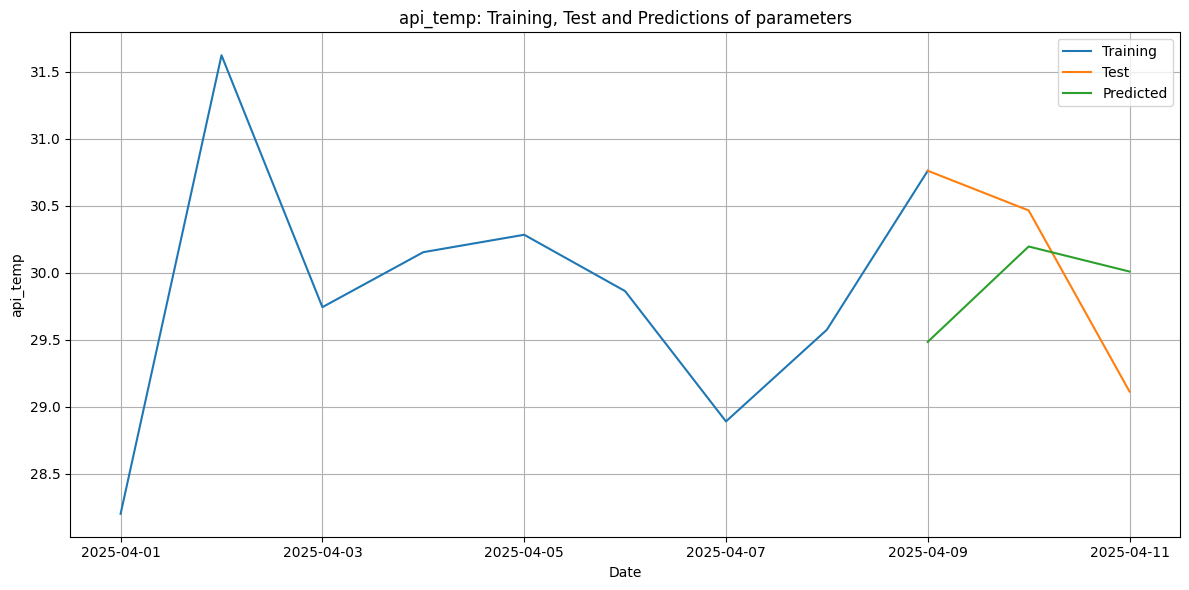

RMSE is :  0.9142454585400088


In [12]:
api_temp_prediction = api_temp_model.get_forecast(steps = int(test_data['api_temp'].count())).predicted_mean
forecast_index = pd.date_range(
            start=test_data.index[0],
            freq=timedelta(days=1),
            periods=int(test_data['api_temp'].count()),
        )
api_temp_prediction.columns = ['predicted']

print(api_temp_prediction)

plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, train_data["api_temp"], label="Training")
plt.plot(test_data.index, test_data["api_temp"], label="Test")
plt.plot(test_data.index, api_temp_prediction, label="Predicted")  # use the same x-axis as test

plt.legend()
plt.xlabel("Date")
plt.ylabel("api_temp")
plt.title(f"api_temp: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"RMSE is : ", root_mean_squared_error(test_data['api_temp'], api_temp_prediction))

In [ ]:
# After converting index to DatetimeIndex
forecast_steps = 200
last_date = df.index[-1]

# Generate proper date range (adjust freq='T' for 5-minute intervals etc.)
dates = pd.date_range(
    start=last_date,
    periods=forecast_steps+1,  # Includes start point
    freq='D'                   # Change to your actual frequency (e.g., '5T')
)[1:]  # Exclude first point (last known date)

predicted_values = api_temp_model.get_prediction(
    start=last_date,
    end=last_date + datetime(2)
)
prediction = pd.DataFrame(predicted_values, columns=['predicted'])

print(prediction)


TypeError: function missing required argument 'month' (pos 2)

In [ ]:
# Define start and end for forecast (e.g., next 200 steps after observed data)
start = int(df['soil_moisture'].count())
end = start + 200

# Select exogenous variables for the forecast period
# Make sure this slice corresponds exactly to the forecast horizon
exog_forecast = df[['temperature', 'humidity', 'api_temp']].iloc[start:end+1]

# Call predict with exog inside the method
predicted_values = loaded_model.predict(start=start, end=end, exog=exog_forecast)

# Convert to DataFrame and rename column
prediction = pd.DataFrame(predicted_values, columns=['predicted'])

print(prediction)


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Provided exogenous values are not of the appropriate shape. Required (1185, 3), got (0, 3).

In [ ]:
plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, df["soil_moisture"], label="Actual Data")
plt.plot(test_data.index, prediction, label="Predicted")  # use the same x-axis as test

plt.legend()
plt.xlabel("Date")
plt.ylabel("Soil Moisture")
plt.title("Soil Moisture prediction")
plt.grid(True)
plt.tight_layout()
plt.show()